# Assignment 1 - Part B.1: working with real data

In this assignment you will import and explore/analyze a dataset for classification. You will explore which ML algorithms are best to classify this and you will present your best solution. For this assignment we will use Human Activity dataset:

### Description of the dataset:

The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities performed.

[![IMAGE ALT TEXT HERE](https://img.youtube.com/vi/XOEN9W05_4A/0.jpg)](https://www.youtube.com/watch?v=XOEN9W05_4A)

https://youtu.be/XOEN9W05_4A


The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKINGUPSTAIRS, WALKINGDOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data.

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters. From the procecced input sensors a 561-feature vector with time and frequency domain variables is generated.
For more details see: https://www.kaggle.com/uciml/human-activity-recognition-with-smartphones

> NOTE: we have downloaded this dataset already for you and placed it on the github as HAR.zip

### Steps

In this assignment you will analyze the data, train and evaluate a model based on this dataset. 

These are the generic steps to be taken
1. Frame the problem and look at the big picture.
2. Get the data.
3. Explore the data to gain insights.
4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms
5. Explore many different models and short-list the best ones.
6. Fine-tune your models and combine them into a great solution.
7. Present your solution.
8. Launch, monitor, and maintain your system.
9. Additional Questions



----

In the Notebook this structure is used for dividing the different steps, so make sure you do the implementation and analisis at these location in the notebook. 

You may add additinal code blocks, but keep the seperation of the given structure.

At the end of each block summarize / comment / conclude your current step in the given textblocks.

At the end you have to hand in this notebook together with the notebooks of Assignment 1, when you hand it in you should make sure that you saved it with all output visible. So we can evaluate your notebooks output without directly ruinning it.
In addition (to be sure) you should also save a pdf of the final result.

----

### Hints

The needed dataset is available in our github repository (HAR.zip), how to download this from your notebook and addition hints are available in the Tips & Tricks file

```
Felix Douven, Kasper walraven, Yosha op het Veld
```


# 1. Frame the problem and look at the big picture
Describe the problem at hand and explain your approach

```
The goal is to create a model which is based on the "Train" data that can correctly predict which activity a subject is undertaking. 
The Data will be analised, and checked for any errors such as missing data or duplicate data. Multiple algorithms will be tested and plotted to determine the most succesful Algorithm(s). This model consists of the most succesful algorithm(s) tested.
```


# 2. Get the data.

Initialize the system, get all needed libraries, retreive the data and import it

> NOTE: You can download the dataset directly from github, see Tips & Tricks

In [1]:
import zipfile
import pandas as pd
#import numpy as np
import sklearn
import matplotlib.pyplot as plt

from sklearn import model_selection
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix

from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
import pandas as pd
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.linear_model import SGDClassifier
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from pandas.plotting import scatter_matrix
import matplotlib.pyplot as plt
from sklearn.datasets import load_wine
from warnings import simplefilter
from sklearn.model_selection import cross_val_score
import numpy as np
from sklearn.metrics import accuracy_score
from sklearn.metrics import matthews_corrcoef
from sklearn.metrics import f1_score
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import StackingClassifier
from sklearn.linear_model import LogisticRegression


test = pd.read_csv("test.csv")
train= pd.read_csv("train.csv")
data = pd.concat([test, train])

print(data)

      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0              0.257178          -0.023285          -0.014654   
1              0.286027          -0.013163          -0.119083   
2              0.275485          -0.026050          -0.118152   
3              0.270298          -0.032614          -0.117520   
4              0.274833          -0.027848          -0.129527   
...                 ...                ...                ...   
7347           0.299665          -0.057193          -0.181233   
7348           0.273853          -0.007749          -0.147468   
7349           0.273387          -0.017011          -0.045022   
7350           0.289654          -0.018843          -0.158281   
7351           0.351503          -0.012423          -0.203867   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0            -0.938404         -0.920091         -0.667683         -0.952501   
1            -0.975415         -0.967458         -0.944958 

```
Importing CSV files from same directory and printing them
```


# 3. Explore the data to gain insights.

Explore the data in any possible way, visualize the results (if you have multiple plots of the same kind of data put them in one larger plot)

> NOTE:You can visualize high-dimensional data in 2-d using T-distributed Stochastic Neighbor Embedding, see Tips & Tricks. (You can also visualze it in 3D, as described in the tutorial)



In [2]:
print(f"Train Dataset Shape: {train.shape}")
print(f"Test Dataset Shape: {test.shape}")
print("")
print(f"Train Dataset Missing Data Counts: {train.isna().sum().sum()}")
print(f"Test Dataset Missing Data Counts: {test.isna().sum().sum()}")
print("")
print(f"Train Dataset Duplicate Data Counts: {train.duplicated().sum()}")
print(f"Test Dataset Duplicate Data Counts: {test.duplicated().sum()}")

Train Dataset Shape: (7352, 563)
Test Dataset Shape: (2947, 563)

Train Dataset Missing Data Counts: 0
Test Dataset Missing Data Counts: 0

Train Dataset Duplicate Data Counts: 0
Test Dataset Duplicate Data Counts: 0


```
This shows The shape of the data [columns, rows]

The "missing data counts" shows that no data is missing

The "duplicate data counts" shows that no data is the same
```

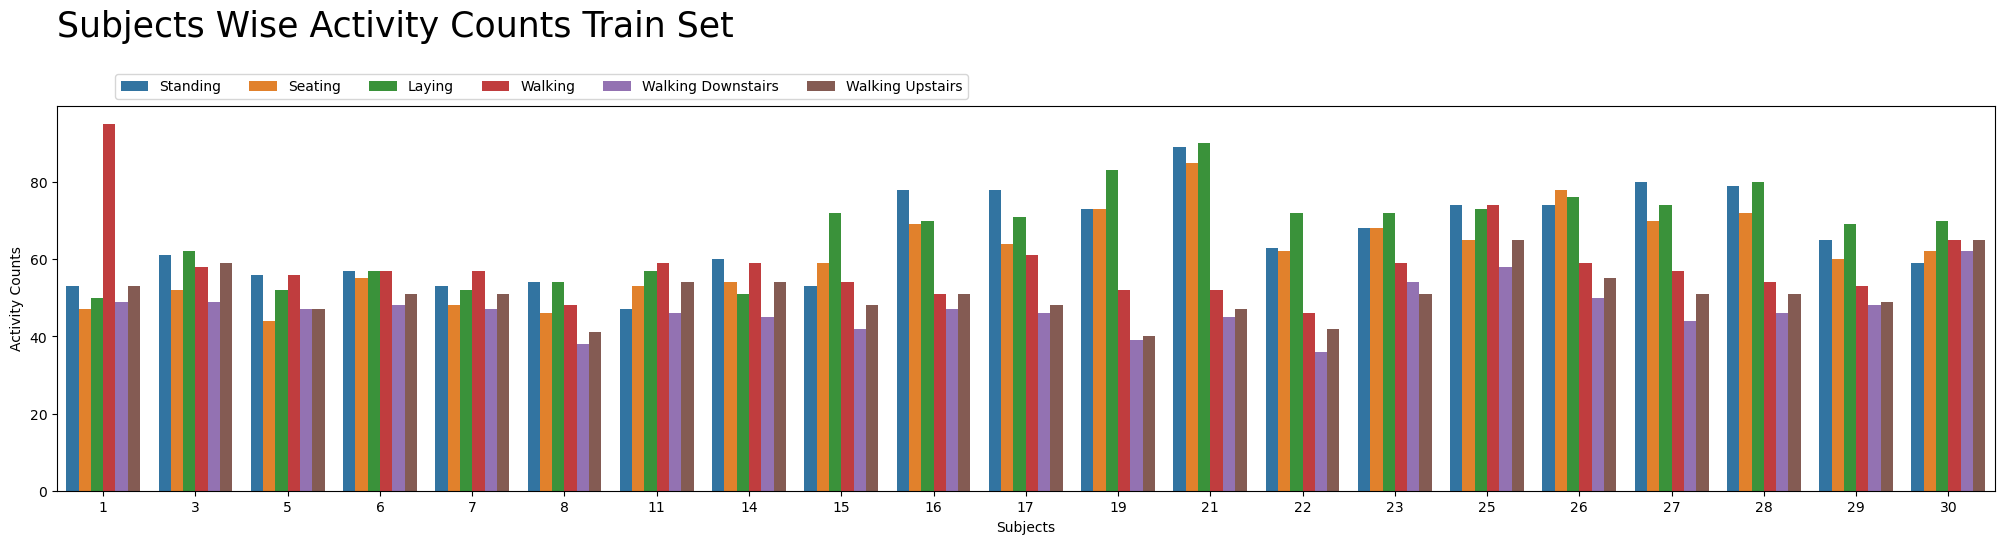

<Figure size 500x500 with 0 Axes>

In [3]:
import os
import time

import warnings
import pandas as pd
#import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from plotly.offline import init_notebook_mode, iplot
import plotly.graph_objs as go
from matplotlib.colors import rgb2hex
from matplotlib.cm import get_cmap
import plotly.express as px
from plotly.subplots import make_subplots
import plotly.figure_factory as ff
from mpl_toolkits import mplot3d
from pylab import rcParams

from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from sklearn.preprocessing import LabelEncoder
from sklearn.linear_model import LogisticRegression,RidgeClassifier
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score, f1_score
from sklearn.model_selection import RandomizedSearchCV
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, StackingClassifier, GradientBoostingClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import GaussianNB

from sklearn.model_selection import train_test_split


plt.figure(figsize=(25, 5))
count_plot=sns.countplot(data=train, x='subject', hue='Activity')
plt.gca().tick_params(axis='x')
plt.gca().tick_params(axis='y')
plt.xlabel( xlabel='Subjects')
plt.ylabel( ylabel='Activity Counts')
plt.legend(["Standing", "Seating", "Laying", "Walking", "Walking Downstairs", "Walking Upstairs"],bbox_to_anchor = (0.25, 1.1), ncol=6, loc='upper center')
plt.title("Subjects Wise Activity Counts Train Set", fontsize=25, loc='left', pad=50)
plt.show()


plt.figure(figsize=(5, 5))
label_counts = train['Activity'].value_counts()
colors = px.colors.qualitative.Plotly

graph = go.Bar(x=label_counts.index, y=label_counts.values, marker = dict(color = colors))
layout = go.Layout(
    height=450, width=1100,
    title = 'Activity Counts Distribution Train Set',
    xaxis = dict(title = 'Activity', tickangle=0, showgrid=False),
    yaxis = dict(title = 'Count', showgrid=False),
    plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
    title_font=dict(size=25, color='#a5a7ab'),
    margin=dict(t=80, b=30, l=70, r=40),
    font=dict(color='#8a8d93'))
fig = go.Figure(data=[graph], layout = layout)
fig.update_traces(textfont=dict(color='#fff'), marker=dict(line=dict(color='#ffffff', width=2)))

iplot(fig)

```
This plot shows how much data each activity contains. The amount of rows per activity equals to how much data is aquired for that activity.
```

D:\programs\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

D:\programs\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.010s...
[t-SNE] Computed neighbors for 7352 samples in 1.568s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.125526
[t-SNE] KL divergence after 1000 iterations: 1.280823


<AxesSubplot:>

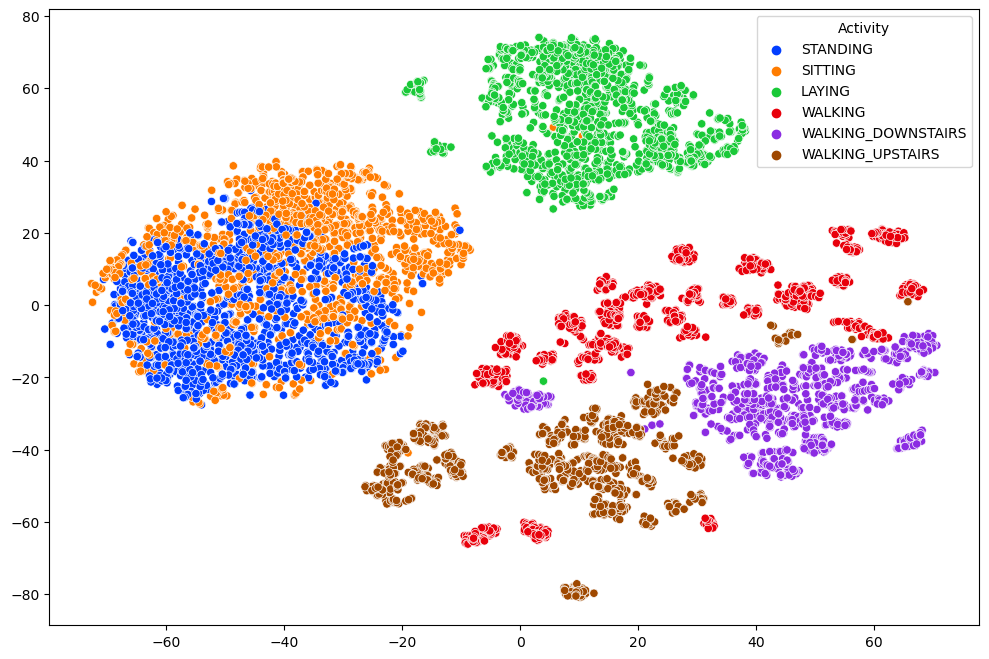

In [4]:
# t-sne (2D)
x_for_tsne = train.drop(['subject', 'Activity'], axis=1)

tsne = TSNE(random_state = 42, n_components=2, verbose=1, perplexity=50, n_iter=1000).fit_transform(x_for_tsne)
plt.figure(figsize=(12,8))
sns.scatterplot(x =tsne[:, 0], y = tsne[:, 1], hue = train["Activity"],palette="bright")

```
In a scatterplot groups are very easily identifiable except standing and sitting. As the picture shows there are clear groups per activity with some outliars. 
```

In [5]:
x_for_tsne = train.drop(['subject', 'Activity'], axis=1)

tsne = TSNE(random_state = 42, n_components=3, verbose=1, perplexity=50, n_iter=1000).fit_transform(x_for_tsne)

fig = px.scatter_3d(
    x =tsne[:, 0],
    y = tsne[:, 1],
    z = tsne[:, 2],
    color=train['Activity']
)
fig.update_layout(
    title="Cluster Of Activities",
    title_font=dict(size=25, color='#a5a7ab'),
    font=dict(color='#8a8d93'),
    plot_bgcolor='#2d3035', paper_bgcolor='#2d3035',
    margin=dict(t=100, b=10, l=70, r=40), 
    )
fig.show()


D:\programs\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:780: FutureWarning:

The default initialization in TSNE will change from 'random' to 'pca' in 1.2.

D:\programs\anaconda\lib\site-packages\sklearn\manifold\_t_sne.py:790: FutureWarning:

The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.



[t-SNE] Computing 151 nearest neighbors...
[t-SNE] Indexed 7352 samples in 0.006s...
[t-SNE] Computed neighbors for 7352 samples in 1.304s...
[t-SNE] Computed conditional probabilities for sample 1000 / 7352
[t-SNE] Computed conditional probabilities for sample 2000 / 7352
[t-SNE] Computed conditional probabilities for sample 3000 / 7352
[t-SNE] Computed conditional probabilities for sample 4000 / 7352
[t-SNE] Computed conditional probabilities for sample 5000 / 7352
[t-SNE] Computed conditional probabilities for sample 6000 / 7352
[t-SNE] Computed conditional probabilities for sample 7000 / 7352
[t-SNE] Computed conditional probabilities for sample 7352 / 7352
[t-SNE] Mean sigma: 1.437672
[t-SNE] KL divergence after 250 iterations with early exaggeration: 74.207909
[t-SNE] KL divergence after 1000 iterations: 1.122070


```
3d Scatterplot in xyz 
```

```
The scatterplot can properly define which subject did which activity with the use of clusters.
```

# 4. Prepare the data to better expose the underlying data patterns to Machine Learning algorithms

prepare your data, is it normalized? are there outlier? Make a training and a test set.


In [6]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.datasets import make_classification

test_data=pd.read_csv("test.csv", usecols=range(0,561))
train_data=pd.read_csv("train.csv", usecols=range(0,561))
data_data = pd.concat([test_data, train_data])

X = data_data
Y = data.Activity
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=None, shuffle = True)

print("There are sampels and dimensions for the features", X.shape)
print("There are sampels and dimensions for the Targets", Y.shape)

print("Training Data input")
print(X_train)
print("")
print("Training Activity Data")
print(y_train)
print("")
print("Testing Data input")
print(X_test)
print("")
print("Testing Activity Data")
print(y_test)


There are sampels and dimensions for the features (10299, 561)
There are sampels and dimensions for the Targets (10299,)
Training Data input
      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
3618           0.276350          -0.017840          -0.108187   
2122           0.259121          -0.020214          -0.107022   
1714           0.276454          -0.018011          -0.112289   
5251           0.275105          -0.091865          -0.042848   
4148           0.234858          -0.008744          -0.102860   
...                 ...                ...                ...   
2364           0.119551          -0.076462          -0.087633   
1816           0.265116           0.011964          -0.122945   
2655           0.300491          -0.011320          -0.121599   
2079           0.283215          -0.017897          -0.114807   
3893           0.318113          -0.013463          -0.105884   

      tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  

```
Data is getting shuffled meaning the rows are getting randomized. Splitting data in data inputs and data outputs (activity) which is used for learning. 
```

# 5. Explore many different models and short-list the best ones.

Explore / train and list the top 3 algorithms that score best on this dataset.

D:\programs\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.

D:\programs\anaconda\lib\site-packages\sklearn\discriminant_analysis.py:878: UserWarning:

Variables are collinear



KNN Not normalized confusion matrix
[[374   0   0   0   0   0]
 [  1 309  34   0   0   0]
 [  0  16 368   0   0   0]
 [  0   0   0 343   0   1]
 [  0   0   0   1 288   0]
 [  0   0   0   0   0 325]]
Linear Not normalized confusion matrix
[[374   0   0   0   0   0]
 [  0 331  13   0   0   0]
 [  0  11 373   0   0   0]
 [  0   0   0 343   0   1]
 [  0   0   0   0 289   0]
 [  0   0   0   0   0 325]]
Poly Not normalized confusion matrix
[[374   0   0   0   0   0]
 [  0 336   8   0   0   0]
 [  0   7 377   0   0   0]
 [  0   0   0 340   4   0]
 [  0   0   0   0 289   0]
 [  0   0   0   0   0 325]]
Rbf Not normalized confusion matrix
[[374   0   0   0   0   0]
 [  0 321  22   0   0   1]
 [  0  22 362   0   0   0]
 [  0   0   0 343   0   1]
 [  0   0   0   1 288   0]
 [  0   0   0   1   0 324]]
DecisionTree Not normalized confusion matrix
[[374   0   0   0   0   0]
 [  0 308  36   0   0   0]
 [  0  33 351   0   0   0]
 [  0   0   0 330   2  12]
 [  0   0   0   7 269  13]
 [  0   0   0  13  1

D:\programs\anaconda\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning:

Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.



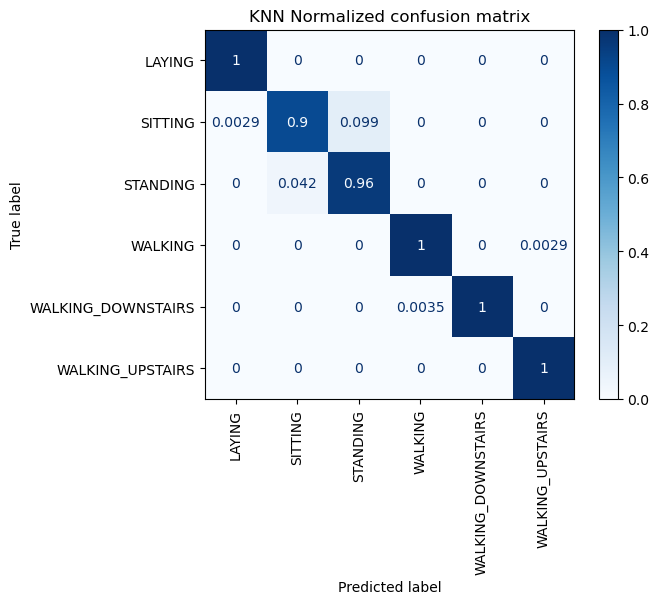

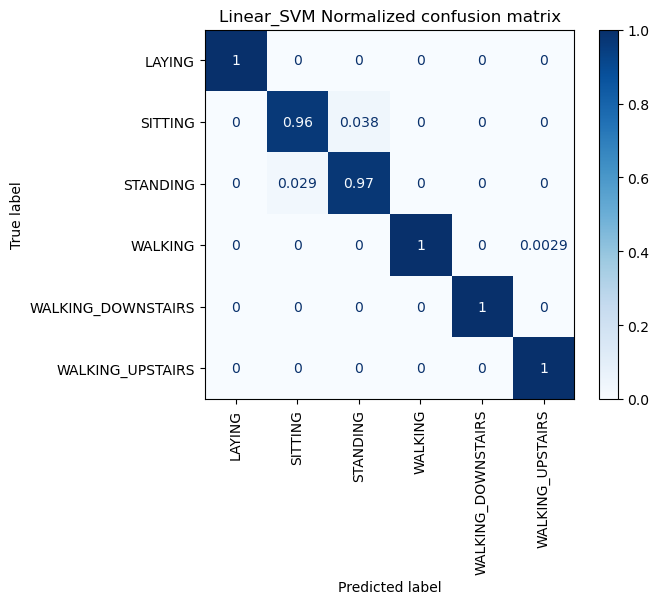

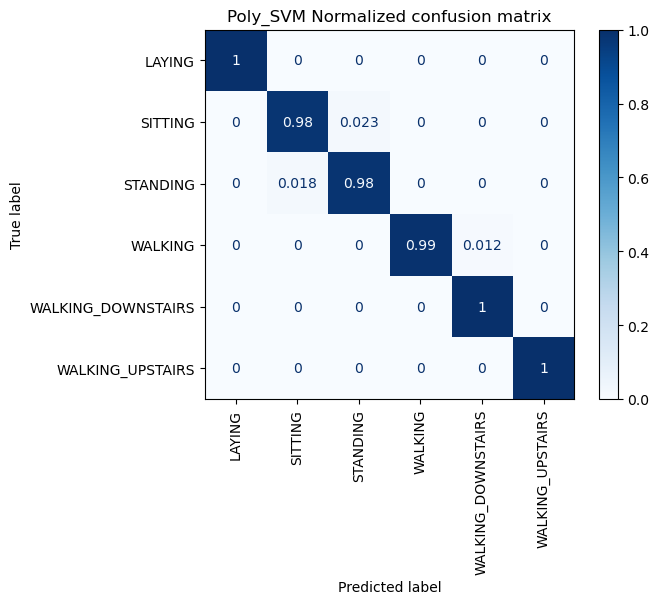

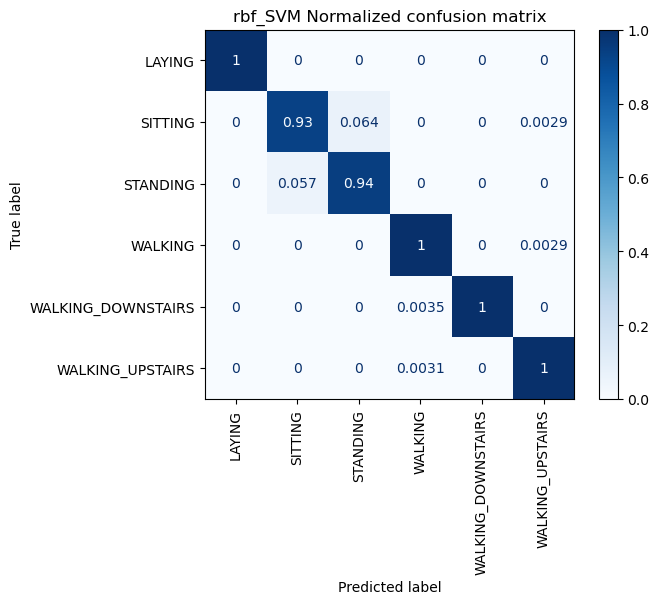

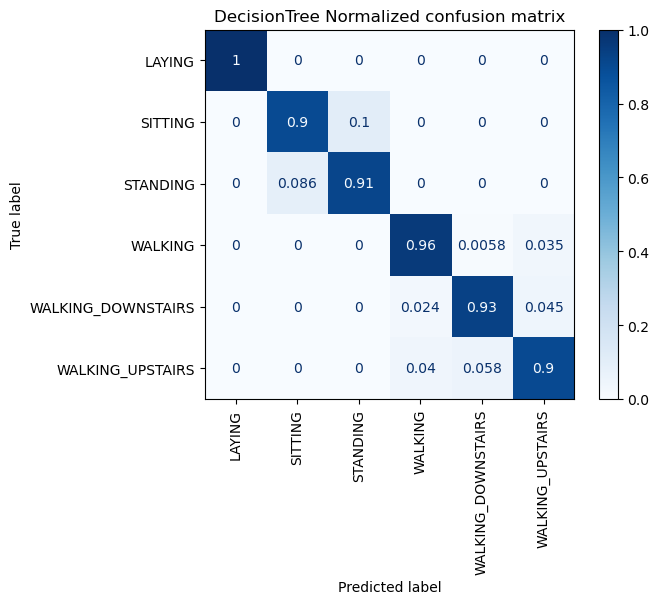

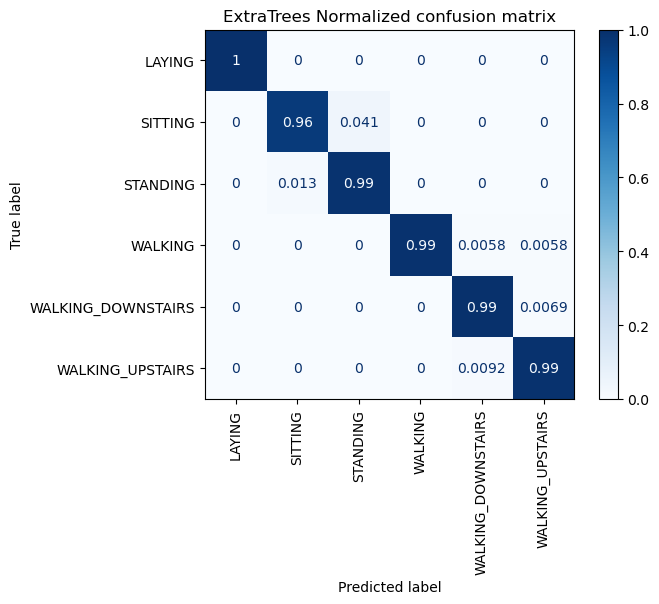

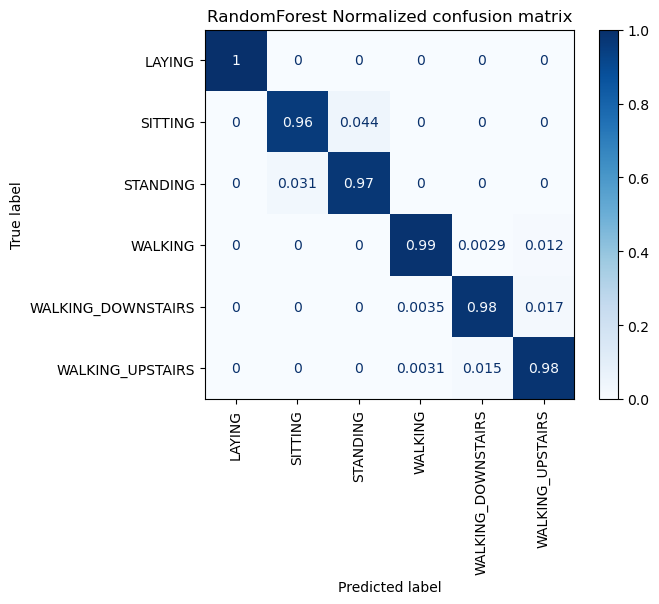

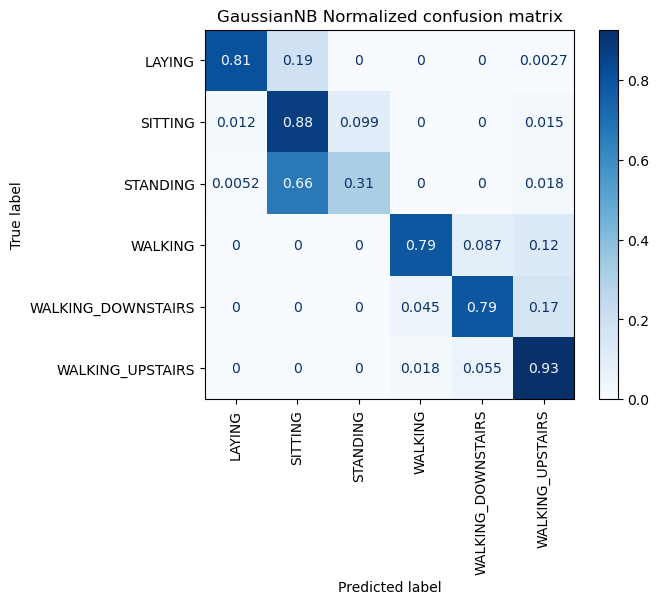

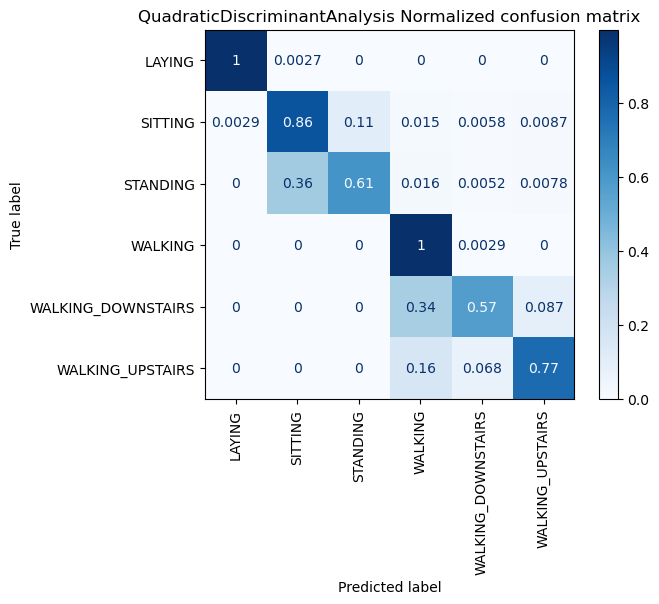

knn accuracy : 97.43 %
lin accuracy : 98.79 %
pol accuracy : 99.08 %
rbf accuracy : 97.67 %
dtc accuracy : 93.45 %
etc accuracy : 98.64 %
rfc accuracy : 97.86 %
gnb accuracy : 73.98 %
qda accuracy : 80.68 %


In [7]:
X = data_data
Y = data.Activity
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=None, shuffle = True)
i = 0

from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier

from sklearn.metrics import ConfusionMatrixDisplay




#algorithm functions
#---------------------------------------------------------------------------
knn = KNeighborsClassifier(n_neighbors=5)
knn.fit(X_train, y_train)
y_pred_knn = knn.predict(X_test)
#---------------------------------------------------------------------------
svclassifier_lin = SVC(kernel='linear')
svclassifier_lin.fit(X_train, y_train)
y_pred_lin = svclassifier_lin.predict(X_test)
#---------------------------------------------------------------------------
svclassifier_pol = SVC(kernel='poly', degree=8)
svclassifier_pol.fit(X_train, y_train)
y_pred_pol = svclassifier_pol.predict(X_test)
#---------------------------------------------------------------------------
svclassifier_rbf = SVC(kernel='rbf')
svclassifier_rbf.fit(X_train, y_train)
y_pred_rbf = svclassifier_rbf.predict(X_test)
#---------------------------------------------------------------------------
dtc = DecisionTreeClassifier()
dtc.fit(X_train, y_train)
y_pred_dtc = dtc.predict(X_test)
#---------------------------------------------------------------------------
etc = ExtraTreesClassifier()
etc.fit(X_train, y_train)
y_pred_etc = etc.predict(X_test)
#---------------------------------------------------------------------------
rfc = RandomForestClassifier()
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
#---------------------------------------------------------------------------
gnb = GaussianNB()
gnb.fit(X_train, y_train)
y_pred_gnb = gnb.predict(X_test)
#---------------------------------------------------------------------------
qda = QuadraticDiscriminantAnalysis()
qda.fit(X_train, y_train)
y_pred_qda = qda.predict(X_test)


#plotting non normalized confusion matrices
print("KNN Not normalized confusion matrix")
print(confusion_matrix(y_test,y_pred_knn))
print("Linear Not normalized confusion matrix")
print(confusion_matrix(y_test,y_pred_lin))
print("Poly Not normalized confusion matrix")
print(confusion_matrix(y_test,y_pred_pol))
print("Rbf Not normalized confusion matrix")
print(confusion_matrix(y_test,y_pred_rbf))
print("DecisionTree Not normalized confusion matrix")
print(confusion_matrix(y_test,y_pred_dtc))
print("ExtraTrees Not normalized confusion matrix")
print(confusion_matrix(y_test,y_pred_etc))
print("RandomForest Not normalized confusion matrix")
print(confusion_matrix(y_test,y_pred_rfc))
print("GaussianNB Not normalized confusion matrix")
print(confusion_matrix(y_test,y_pred_gnb))
print("QuadraticDiscriminantAnalysis Not normalized confusion matrix")
print(confusion_matrix(y_test,y_pred_qda))



#lists of algorithms
class_names = data.Activity
titles_options = [
    ("KNN Normalized confusion matrix", "true"),
    ("Linear_SVM Normalized confusion matrix", "true"),
    ("Poly_SVM Normalized confusion matrix", "true"),
    ("rbf_SVM Normalized confusion matrix", "true"),
    ("DecisionTree Normalized confusion matrix", "true"),
    ("ExtraTrees Normalized confusion matrix", "true"),
    ("RandomForest Normalized confusion matrix", "true"),
    ("GaussianNB Normalized confusion matrix", "true"),
    ("QuadraticDiscriminantAnalysis Normalized confusion matrix", "true")
]

algo_names = [
    knn,
    svclassifier_lin,
    svclassifier_pol,
    svclassifier_rbf,
    dtc,
    etc,
    rfc,
    gnb,
    qda
]


title_names = [
    "knn",
    "lin",
    "pol",
    "rbf",
    "dtc",
    "etc",
    "rfc",
    "gnb",
    "qda"
    
]

pred_names = [
    y_pred_knn,
    y_pred_lin,
    y_pred_pol,
    y_pred_rbf,
    y_pred_dtc,
    y_pred_etc,
    y_pred_rfc,
    y_pred_gnb,
    y_pred_qda
]

#plotting normalized matrices
for title, normalize in titles_options: 
    disp = ConfusionMatrixDisplay.from_estimator(algo_names[i], X_test, y_test, cmap=plt.cm.Blues, normalize=normalize, xticks_rotation="vertical")
    disp.ax_.set_title(title)
    i = i + 1
plt.show()

#printing and calculting accuracy
i = 0
for title in title_names:
    print(title,"accuracy :", round(sklearn.metrics.accuracy_score(y_test, pred_names[i])*100, 2),"%")
    i = i + 1


#disp = ConfusionMatrixDisplay.from_estimator(svclassifier_lin, X_test, y_test, cmap=plt.cm.Blues, normalize=normalize, xticks_rotation="vertical")
#disp.ax_.set_title(title)
#disp = ConfusionMatrixDisplay.from_estimator(svclassifier_pol, X_test, y_test, cmap=plt.cm.Blues, normalize=normalize, xticks_rotation="vertical")
#disp.ax_.set_title(title)
#disp = ConfusionMatrixDisplay.from_estimator(svclassifier_rbf, X_test, y_test, cmap=plt.cm.Blues, normalize=normalize, xticks_rotation="vertical")
#disp.ax_.set_title(title)

#print("knn accuracy :", round(sklearn.metrics.accuracy_score(y_test, y_pred_knn)*100, 2),"%")
#print("lin accuracy :", round(sklearn.metrics.accuracy_score(y_test, y_pred_lin)*100, 2),"%")
#print("pol accuracy :", round(sklearn.metrics.accuracy_score(y_test, y_pred_pol)*100, 2),"%")
#print("rbf accuracy :", round(sklearn.metrics.accuracy_score(y_test, y_pred_rbf)*100, 2),"%")

#print(classification_report(y_test,y_pred))


```
First a not normalized version of the confusion graph is made, it's hard to see the different accuracies in the not normalized graph. This is why a plot is made of every normalized (meaning 100% correct = 1) algorithm. The perfect model should have a score of 1 when all predictions are correct. 
The accuracy can be seen underneath the last graph. This shows lineair, poly and etc are the top 3 most accurate algorithms.
```

# 6. Fine-tune your models and combine them into a great solution.

Can you get better performance within a model? e.g if you use a KNN classifier how does it behave if you change K (k=3 vs k=5 vs k=?). Which parameters are here to tune in the chosen models? 

In [8]:
X_train, X_test, y_train, y_test = train_test_split(
    X,Y, stratify=Y, test_size=0.2, random_state=42
)

svclassifier_lin = SVC(kernel='linear', shrinking=False, tol=0.0001, class_weight=None, max_iter=-1)
svclassifier_lin.fit(X_train, y_train)
y_pred_lin = svclassifier_lin.predict(X_test)

y_train_pred = svclassifier_lin.predict(X_train)
y_test_pred = svclassifier_lin.predict(X_test)

lin_train_accuracy = accuracy_score(y_train, y_train_pred) 
 

# Test set performance
lin_test_accuracy = accuracy_score(y_test,y_test_pred) 


print('Model performance for Training set')
print('- Accuracy: %s' % round(lin_train_accuracy*100,2), "%")

print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % round(lin_test_accuracy*100,2), "%")

Model performance for Training set
- Accuracy: 99.22 %
----------------------------------
Model performance for Test set
- Accuracy: 98.93 %


```
After altering the linear parameters the model has an accuracy of almost 99% this is more than the non optimized algorithm.
```

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X,Y, stratify=Y, test_size=0.2, random_state=42
)

svclassifier_pol = SVC(kernel='poly', gamma = 10, C = 1, degree=5)
svclassifier_pol.fit(X_train, y_train)
y_pred_pol = svclassifier_pol.predict(X_test)

y_train_pred = svclassifier_pol.predict(X_train)
y_test_pred = svclassifier_pol.predict(X_test)

pol_train_accuracy = accuracy_score(y_train, y_train_pred) 
 

# Test set performance
pol_test_accuracy = accuracy_score(y_test,y_test_pred) 


print('Model performance for Training set')
print('- Accuracy: %s' % round(pol_train_accuracy*100,2), "%")

print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % round(pol_test_accuracy*100,2), "%")

Model performance for Training set
- Accuracy: 100.0 %
----------------------------------
Model performance for Test set
- Accuracy: 99.22 %


```
"Gamma" is a parameter for non linear hyperplanes. The higher the gamma value it tries to exactly fit the training data set

"C" is the penalty parameter of the error term. It controls the trade off between smooth decision boundary and classifying the training points correctly.

"Degree" is a parameter used when kernel is set to ‘poly’. It’s basically the degree of the polynomial used to find the hyperplane to split the data.


This algorithm increases the accuracy at from 99.08% to 99.22%

```

In [10]:
X_train, X_test, y_train, y_test = train_test_split(
    X,Y, stratify=Y, test_size=0.2, random_state=42
)

etc = ExtraTreesClassifier(n_estimators=500, min_samples_split=3, max_depth=500)
etc.fit(X_train, y_train)
y_pred_etc = etc.predict(X_test)

y_train_pred = etc.predict(X_train)
y_test_pred = etc.predict(X_test)

etc_train_accuracy = accuracy_score(y_train, y_train_pred) 
 

# Test set performance
etc_test_accuracy = accuracy_score(y_test,y_test_pred) 


print('Model performance for Training set')
print('- Accuracy: %s' % round(etc_train_accuracy*100,2), "%")

print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % round(etc_test_accuracy*100,2), "%")


Model performance for Training set
- Accuracy: 100.0 %
----------------------------------
Model performance for Test set
- Accuracy: 98.93 %


```
n_estimators is the number of trees to be used in the forest algorithm.

min_samples_split represents the minimum number of samples required to split an internal node. This can vary between considering at least one sample at each node to considering all of the samples at each node. When we increase this parameter, the tree becomes more constrained as it has to consider more samples at each node. Here we will vary the parameter from 10% to 100% of the samples

The first parameter to tune is max_depth. This indicates how deep the tree can be. The deeper the tree, the more splits it has and it captures more information about the data. We fit a decision tree with depths ranging from 1 to 32 and plot the training and test auc scores.

The accuracy of the extra trees algorithm increased from 98.64% to 98.93%
```

In [11]:
estimator_list = [
    ('lin',svclassifier_lin),
    ('pol',svclassifier_pol),
    ('etc',etc) ]
stack_model = StackingClassifier(
    estimators=estimator_list, final_estimator=LogisticRegression()
)
stack_model.fit(X_train, y_train)
y_train_pred = stack_model.predict(X_train)
y_test_pred = stack_model.predict(X_test)


stack_model_train_accuracy = accuracy_score(y_train, y_train_pred) 
stack_model_test_accuracy = accuracy_score(y_test, y_test_pred) 


print('Model performance for Training set')
print('- Accuracy: %s' % round(stack_model_train_accuracy*100,2), "%")

print('----------------------------------')
print('Model performance for Test set')
print('- Accuracy: %s' % round(stack_model_test_accuracy*100,2), "%")


D:\programs\anaconda\lib\site-packages\sklearn\linear_model\_logistic.py:814: ConvergenceWarning:

lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression



Model performance for Training set
- Accuracy: 100.0 %
----------------------------------
Model performance for Test set
- Accuracy: 99.66 %


```
combining 3 algorithms into one model to have the highest accuracy.
```

# 7. Present your solution.

Explain why you would choose for a specific model



```
Total code of the assignment is shown above

This model is chosen to get the highest accuracy. combining the 3 most acurate algorithms together will be sufficient to have an accuracy of 99.66%
```


# 8. Launch, monitor, and maintain your system.

Deployment we will do in the next assignment!

# 9. Additional Questions


* Explain which classes should be easy / challenging to classify based on your  2/3D plots the data? 

* Explain what specifics you did to this dataset for preparing your data? 

* Explain why you think that your chosen algorithm outperforms the rest? 


```
Based on the 2d and 3d plots, standing and sitting should be hard to identify. Its very likely that the movement will be the same. laying on the other hand will be very easy to identify among the others because of its seporated group. 

We are splitting the data in input and output while also randomizing this data. This causes the ai to discard the idea to replay data in the same order. 

Our model should perform better than a singular algorithm. this is also proven by having the highest accuracy of all separate algorithms. The SVC models should be the best at identifying groups of similar data. This is also interpreted in our model.
```
